In [0]:
import pandas as pd


test_data= pd.read_csv('https://s3.amazonaws.com/drivendata/data/2/public/5c9fa979-5a84-45d6-93b9-543d1a0efc41.csv',index_col=0)

data = pd.read_csv('https://s3.amazonaws.com/drivendata/data/2/public/9db113a1-cdbe-4b1c-98c2-11590f124dd8.csv',index_col=0)

submission = pd.read_csv('https://s3.amazonaws.com/drivendata/data/2/public/BloodDonationSubmissionFormat.csv',index_col=0)



y=data['Made Donation in March 2007']

X=data.drop(['Made Donation in March 2007'],axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

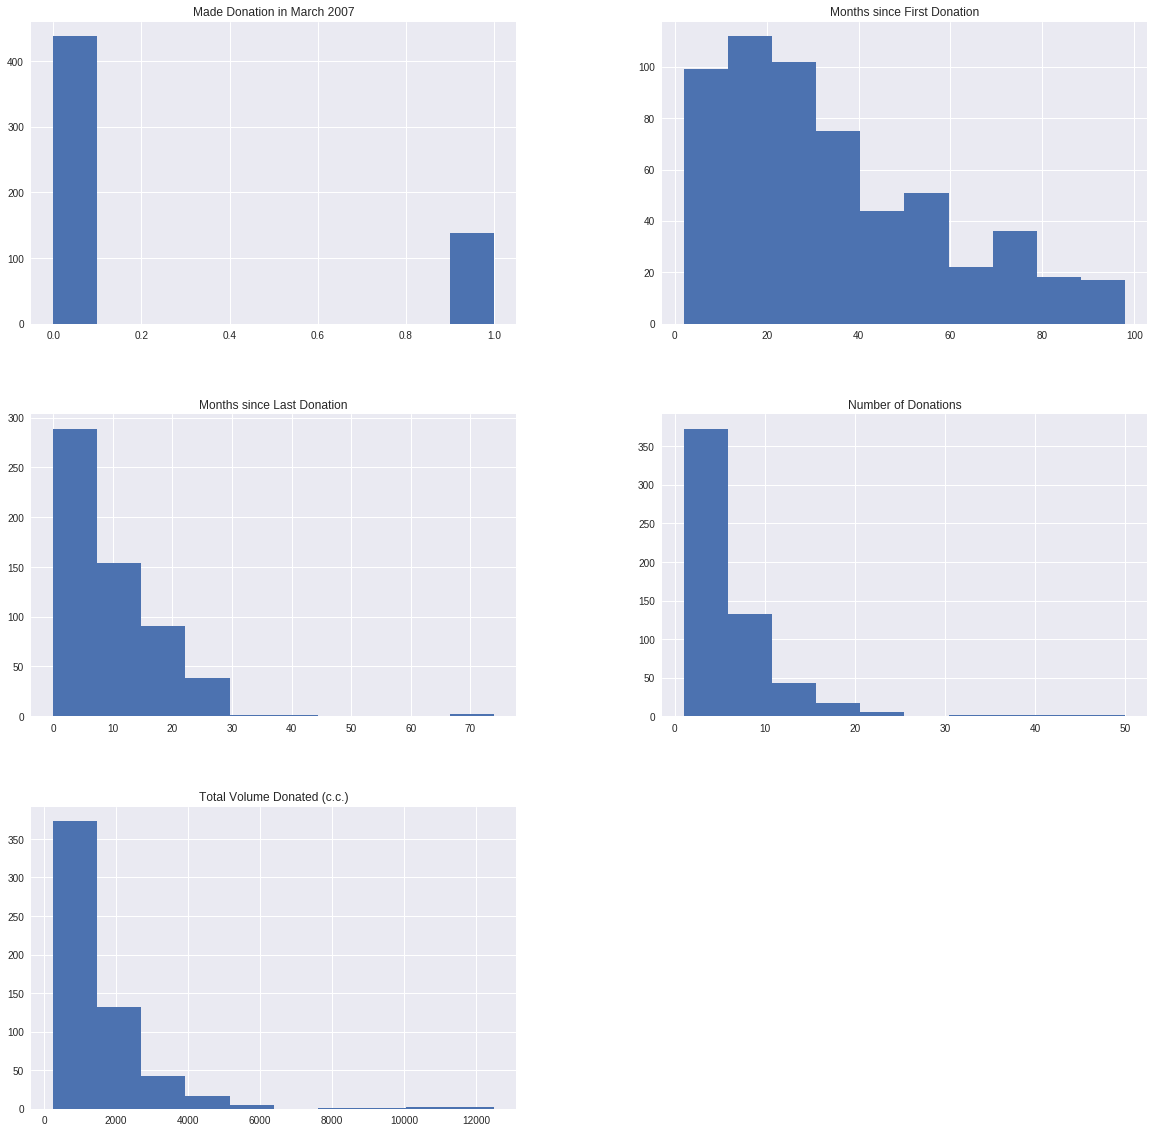

In [3]:
import matplotlib.pyplot as plt

data.hist(figsize = (20, 20))
plt.show()


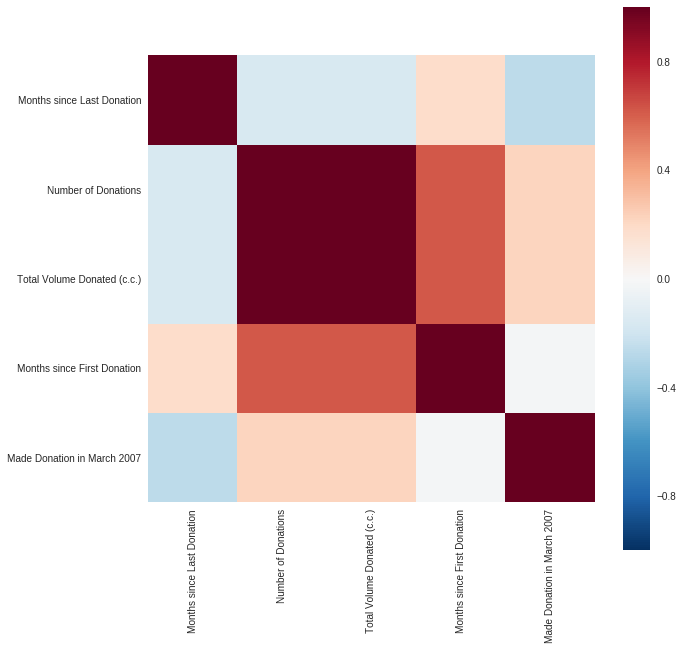

In [5]:
import seaborn as sns

corrmat = data.corr()
fig = plt.figure(figsize = (10, 10))

sns.heatmap(corrmat, square = True)
plt.show()


In [0]:

"""
y=data['Made Donation in March 2007']

X = data.drop(['Made Donation in March 2007'],axis=1)
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

"""

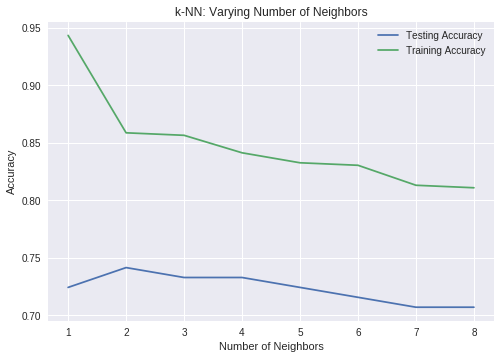

In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier



neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


#Knn


---





In [10]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=2)
#knn.fit(X_train,y_train)
knn.fit(X,y)
pred_knn = knn.predict_proba(test_data)

print(knn.score(X_test, y_test))

0.7758620689655172


#Log Reg

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

logreg = LogisticRegression()


logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

#logreg_cv.fit(X_train,y_train)
logreg_cv.fit(X,y)
pred_logreg = logreg_cv.predict_proba(test_data)


print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327, 'penalty': 'l1'}
Best score is 0.7847222222222222


# Xgboost

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
#model.fit(X_train, y_train)
model.fit(X, y)
pred_xgb  = model.predict_proba(test_data)
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy: %.2f" % (accuracy))



In [0]:
predictions = pred_xgb[:,1]
df = pd.DataFrame(predictions , columns = ["Made Donation in March 2007"],index=test_data.index)
df.to_csv("XGboost.csv")


from google.colab import files
files.download('XGboost.csv') 

In [0]:
predictions = pred_logreg[:,1]
df = pd.DataFrame(predictions , columns = ["Made Donation in March 2007"],index=test_data.index)
df.to_csv("LogregCV.csv")

from google.colab import files
files.download('LogregCV.csv') 

In [0]:
predictions = pred_knn[:,1]
df = pd.DataFrame(predictions , columns = ["Made Donation in March 2007"],index=test_data.index)
df.to_csv("Knn.csv")

from google.colab import files
files.download('Knn.csv') 




In [0]:
"""
xgboost log loss = 0.48
log reg cv = 0.44
knn = 3.9

"""